In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from src.california_housing import read_data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [100]:
# Load train and test data
df_train = read_data.read_file("fish_regression", "strat_train_set", csv=True)
df_test = read_data.read_file("fish_regression", "strat_test_set", csv=True)

# Check Assumptions

**Linearity:** First we check whether there is a linear relationship between each independant variable on the dependant variable "Weight". This seems to be the case. Actually not a clear linear relationship, but lets set that aside for now.

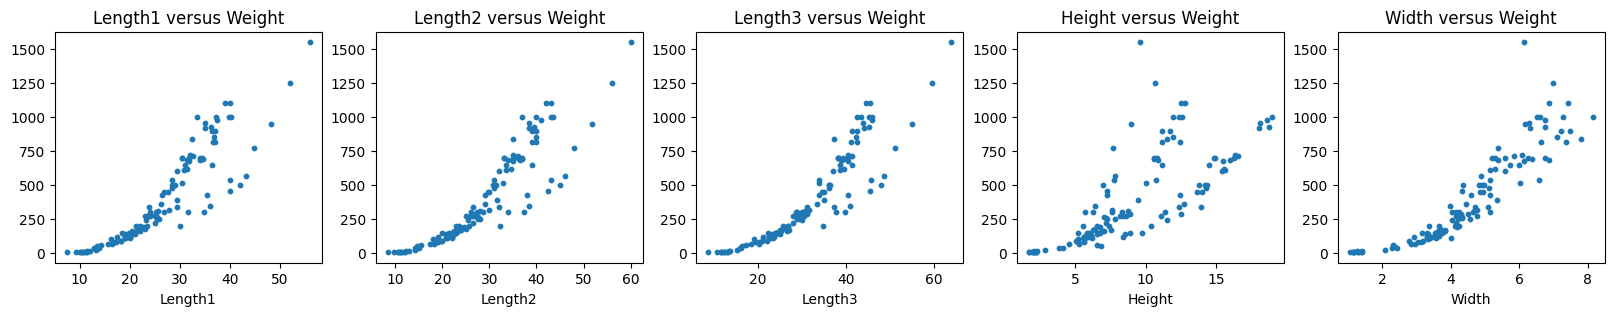

In [101]:
# Create basic Scatter plot
fig, ax = plt.subplots(figsize=(20, 3), ncols=5)

# List of column names to plot
columns_to_plot = ["Length1", "Length2", "Length3", "Height", "Width"]

for i, column in enumerate(columns_to_plot):
    ax[i].scatter(df_train[column], df_train["Weight"], s=10)
    ax[i].set_xlabel(column)
    ax[i].set_title(f"{column} versus Weight")

plt.show()

# Multiple Linear Regression

### Compute Regression

In [108]:
# Train Dataset: independent variable (Weight), y: dependent variable (Length1)
X_train = df_train.drop(["Weight", "Species"], axis=1)
y_train = df_train['Weight']
# Test Dataset: independent variable (Weight), y: dependent variable (Length1)
X_test = df_test.drop(["Weight", "Species"], axis=1)
y_test = df_test['Weight']

In [109]:
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [110]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate residuals for the test set
test_residuals = y_test - y_pred

In [111]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)
# Calculate residuals for the training set
train_residuals = y_train - y_train_pred

In [112]:
# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [113]:
# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [116]:
# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(50*"-")
# Evaluate the model
print("Mean Squared Error Test-Set:", mse_test)
print("R-squared Test-Set:", r2_test)
print(50*"-")
print("Mean Squared Error Train-Set:", mse_train)
print("R-squared Train-Set:", r2_train)

Coefficients: [ 85.83677277 -33.02158609 -29.0920661   30.85578894  37.73748504]
Intercept: -458.2167935370588
--------------------------------------------------
Mean Squared Error Test-Set: 24935.52097566841
R-squared Test-Set: 0.870431566740735
--------------------------------------------------
Mean Squared Error Train-Set: 12819.734598035393
R-squared Train-Set: 0.883730449881418


### Diagnostics

#### Train Dataset

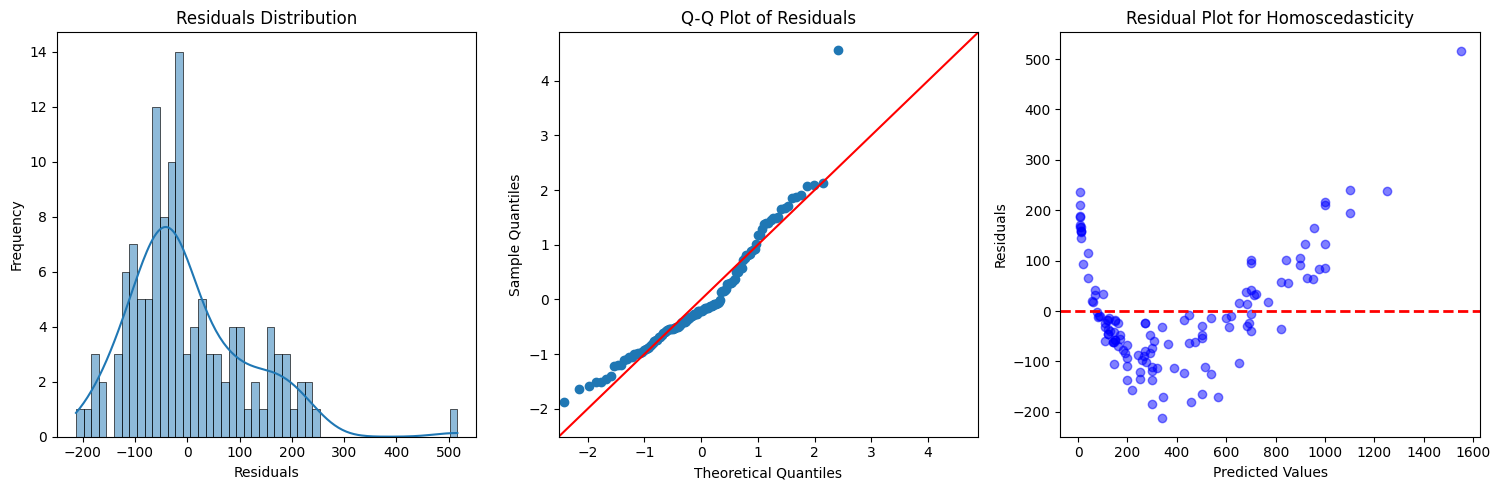

In [97]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)

# Plot the residuals distribution for the training set
sns.histplot(train_residuals, bins=50, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Q-Q plot of residuals for the training set
sm.qqplot(train_residuals, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Create a residual plot
ax[2].scatter(y_train, train_residuals, color='blue', alpha=0.5)
ax[2].axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Residual Plot for Homoscedasticity')

plt.tight_layout()
plt.show()

#### Test Dataset

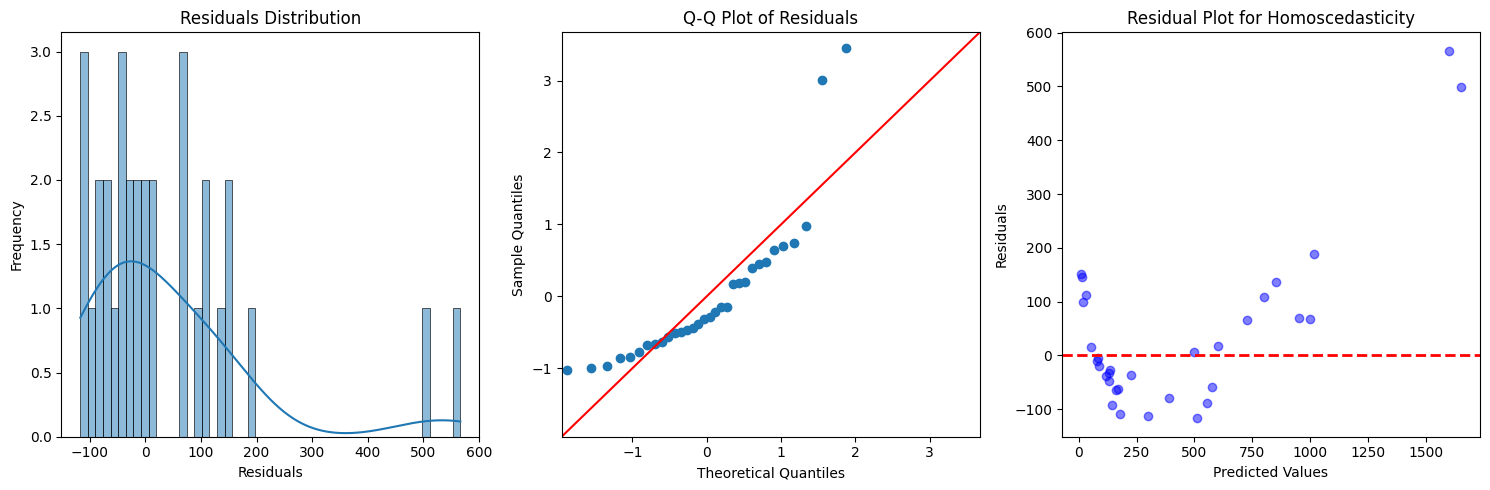

In [98]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)

# Plot the residuals distribution for the training set
sns.histplot(test_residuals, bins=50, kde=True, ax=ax[0])
ax[0].set_title('Residuals Distribution')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Q-Q plot of residuals for the training set
sm.qqplot(test_residuals, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Create a residual plot
ax[2].scatter(y_test, test_residuals, color='blue', alpha=0.5)
ax[2].axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Residuals')
ax[2].set_title('Residual Plot for Homoscedasticity')

plt.tight_layout()
plt.show()